In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
import plotly.graph_objects as go
import plotly.express as px

import sklearn as sk
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
import tensorflow as tf

from pylab import rcParams

In [3]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')  #Full file path to project folder: /content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry/

/content/gdrive/My Drive/Projects/GRCA-Spring-WaterChemistry


In [5]:
ls

 AdminMap_hydrosites.xlsx
 All_Site_Summary_Data_09182020.xlsx
'Appendix F- Geochemistry and Conversions.csv'
'Appendix F- Geochemistry and Conversions.gsheet'
'Appendix F- Geochemistry.csv'
'Appendix F- Geochemistry.gsheet'
'Copy of All_Site_Summary_Data_09182020.xlsx'
'Copy of NPS_GCNP_spring_stream_chemistry_results_ScienceBase_07-20-2020.xlsx'
 GRCA-Spring-WaterChem.ipynb
 h_cluster_KP-Springs.png
 KP_springs.png
 NPS_GCNP_spring_stream_chemistry_results_ScienceBase_07-20-2020.xlsx


In [6]:
# from google.colab import files  
# uploaded = files.upload()


### Springs used in this Analysis

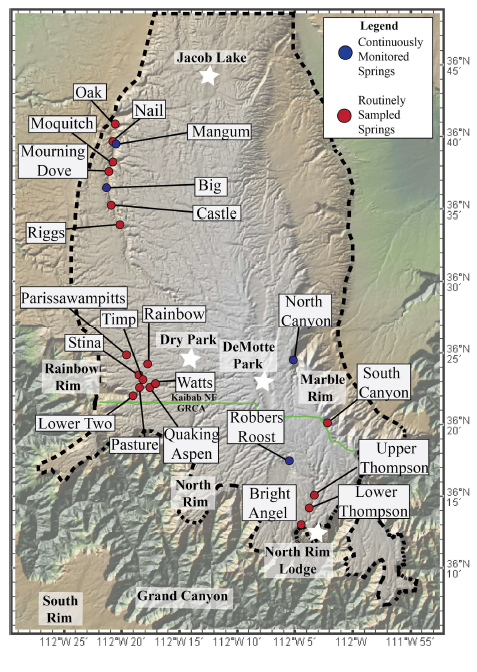

In [7]:
from IPython.display import Image
Image('KP_springs.png')

#Note: image originally from Wood, A.J., 2019, Hydrogeology of the Coconino Aquifer, Kaibab Plateau, Grand Canyon, AZ 

### Import chemistry data from Kaibab Plateau Springs

In [9]:
#dataset from Wood, A.J., 2019, Hydrogeology of the Coconino Aquifer, Kaibab Plateau, Grand Canyon, AZ 
KPchem = pd.read_csv('Appendix F- Geochemistry.csv' )  #if multiple headers include: header=[0,1]
KPchem.sample(10)

,Name,Easting,Northing,Date,Na23 (ug/L),Mg24 (2+) (ug/L),K39 (ug/L),Ca40 (2+) (ug/L),F- (umoles/L),Cl- (umoles/L),NO2- (umoles/L),Br- (umoles/L),NO3- (umoles/L),PO4 (umoles/L),SO4 (umoles/L),Ca+Mg mg/L,original alk w/Ca+Mg fill (mg/L)
28,Castle,379992,4049812,4/8/2018,2624.295124,22191.06800,65.258000,43710.29700,4.927,69.236000,0,0,0,0,42.407000,65.901,260.000000
73,Nail,379667,4054101,8/4/2018,4062.926148,30208.58405,2204.041592,50812.83020,5.486524111,138.414557,1.866566638,1.737563945,7.573702885,0,157.093980,81.021,243.419969
94,Oak,380528,4059913,8/4/2018,7327.201260,34462.74765,4059.536943,52543.00688,21.60001799,292.541132,0,11.0343463,52.04729397,0,681.524521,87.006,200.000000
146,Stina,382725,4028104,9/1/2018,2209.781168,31220.86647,2406.789871,69043.13292,5.013914537,60.966046,10.08599056,0,100.6514671,5.570810295,40.047615,100.264,312.000000
118,Quaking Aspen,384952,4026666,11/10/2018,1370.110903,26334.77913,498.168714,65931.39479,7.681526256,29.918937,BDL,3.357287051,11.13436673,6.360956008,24.245252,92.266,242.000000
60,Mangum,380011,4053934,8/4/2018,4665.488940,35906.75716,2428.475048,61281.68266,5.939982305,128.358113,0,1.769697996,18.58355382,2.105227306,134.433088,97.188,268.000000
93,Oak,380528,4059913,7/14/2018,7159.194159,33674.31800,2877.216000,50461.09200,9.463,306.058000,0,1.362,47.91,0,735.494000,84.135,216.000000
106,Parisawampitts,381962,4030563,8/5/2018,1929.445320,38310.30100,1773.566089,65337.66949,5.863555252,38.578757,26.7854754,2.230309307,13.12473841,4.507907863,28.017035,103.648,318.000000
135,Robbers Roost,402199,4015554,8/6/2018,1636.202704,21314.01537,2634.133036,43427.29947,3.877562319,47.487977,0,0,28.0263729,3.036909096,59.807360,64.741,212.881758
156,Upper Thompson,405211,4013335,6/26/2018,1840.021218,22343.48300,1505.472000,54402.39000,4.095,56.201000,0,0,0,0,27.408000,76.746,218.000000


In [10]:
# #Function to filter out springs from dataset:
# def spring(spring_name):
#   spring_name = KPchem[KPchem['Name']==str(spring_name)]
#   return spring_name

# Big = spring('Big')

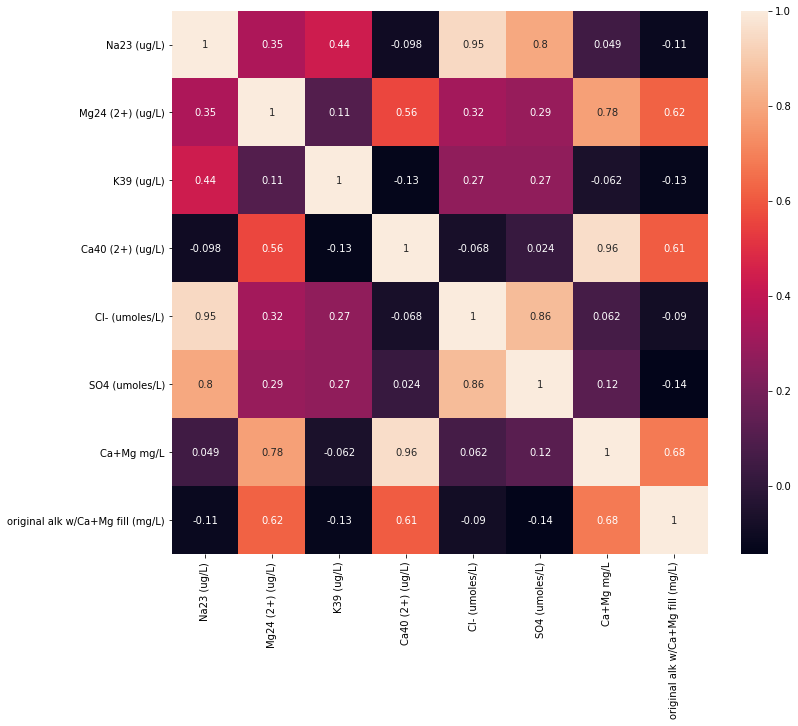

In [12]:
rcParams['figure.figsize'] = 12, 10
sns.heatmap(KPchem2.corr(), annot=True)

## Perform kmeans+ clustering on just two features first in order to visualize clusters. Then perform clustering on entire dataset 
Will be difficult to visualize with the high dimensionality once all the features are added.

In [13]:
# Plot features on each axis

fig = px.scatter(KPchem, x=KPchem['Na23 (ug/L)'], y=KPchem['K39 (ug/L)'], color='Name')
fig.show()

#plt.scatter(x=KPchem['Na23 (ug/L)'], y=KPchem['K39 (ug/L)'],cmap=KPchem['Name'])
# KPchem[['Name','Na23 (ug/L)', 'Mg24 (2+) (ug/L)']].plot(type='scatter')

In [14]:
#Create dataframe with just chemistry from springs and changing entries of "Beyond Detectable Limits (BDL)" to just 0.

KPchem2 = KPchem.iloc[:,4:].replace('BDL',0)
KPchem2.head()

,Na23 (ug/L),Mg24 (2+) (ug/L),K39 (ug/L),Ca40 (2+) (ug/L),F- (umoles/L),Cl- (umoles/L),NO2- (umoles/L),Br- (umoles/L),NO3- (umoles/L),PO4 (umoles/L),SO4 (umoles/L),Ca+Mg mg/L,original alk w/Ca+Mg fill (mg/L)
0,2539.155064,22339.372,1045.799,40251.300,2.569,59.588,0.476,0,12.887,0.463,31.260,62.591,208.847582
1,2461.661456,22247.263,881.265,45154.379,2.486,55.911,0.368,0,14.849,0,31.235,67.402,217.871999
2,2162.914683,19640.407,524.854,41325.020,3.072,57.889,1.656,0,4.661,0,31.920,60.965,234.000000
3,2212.489881,20839.958,522.227,42321.146,3.021,56.382,1.109,0,3.846,0,31.178,63.161,234.000000
4,2165.671774,20881.355,549.365,44613.817,2.848,56.014,0,0,0,0,30.607,65.495,180.000000


In [37]:
#Create dataframe with name of spring as index
KPchem['Name-Date'] = KPchem['Name'].astype(str) + ', ' + KPchem['Date'].astype(str)
KPchem3 = KPchem.drop(['Name','Date', 'Easting', 'Northing'], axis=1)  #df.pop returns the columns you want to remove.
KPchem3.set_index('Name-Date', inplace=True)
KPchem3 = KPchem3.replace('BDL',0)
KPchem3.head()

,Na23 (ug/L),Mg24 (2+) (ug/L),K39 (ug/L),Ca40 (2+) (ug/L),F- (umoles/L),Cl- (umoles/L),NO2- (umoles/L),Br- (umoles/L),NO3- (umoles/L),PO4 (umoles/L),SO4 (umoles/L),Ca+Mg mg/L,original alk w/Ca+Mg fill (mg/L)
Name-Date,,,,,,,,,,,,,
"Big, 11/12/2017",2539.155064,22339.372,1045.799,40251.300,2.569,59.588,0.476,0,12.887,0.463,31.260,62.591,208.847582
"Big, 12/18/2017",2461.661456,22247.263,881.265,45154.379,2.486,55.911,0.368,0,14.849,0,31.235,67.402,217.871999
"Big, 4/7/2018",2162.914683,19640.407,524.854,41325.020,3.072,57.889,1.656,0,4.661,0,31.920,60.965,234.000000
"Big, 4/7/2018",2212.489881,20839.958,522.227,42321.146,3.021,56.382,1.109,0,3.846,0,31.178,63.161,234.000000
"Big, 5/25/2018",2165.671774,20881.355,549.365,44613.817,2.848,56.014,0,0,0,0,30.607,65.495,180.000000


## Perform unsupervised kmeans+ clustering on limited dataset


In [38]:
kmeans = KMeans(n_clusters=5)

In [39]:
kmeans.fit(KPchem2[['Na23 (ug/L)', 'K39 (ug/L)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans.cluster_centers_

array([[1737.43560598,  518.10885643],
       [4716.7948175 , 2202.55183409],
       [2032.96207557, 2171.76167714],
       [3643.31741063,  666.71645352],
       [7619.272326  , 3554.5409022 ]])

In [41]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 1, 4, 4, 4, 4, 4, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0], dtype=int32)

In [42]:
#Plot the clusters for the two features

fig = px.scatter(KPchem2, x=KPchem['Na23 (ug/L)'], y=KPchem['K39 (ug/L)'], color= kmeans.labels_)
fig.show()

# fig, ax1 = plt.subplots(1,figsize=(10,6))
# ax1.set_title('K Means')
# ax1.scatter(KPchem2['Br- (umoles/L)'], KPchem2['F- (umoles/L)'], c=kmeans.labels_,cmap='rainbow')


In [43]:
KPchem2.shape

(171, 13)

## Clustering using kmeans+ on entire dataset

In [44]:
kmeans.labels_.shape

(171,)

In [45]:
# Run Lloyd's/kmeans+ algorithm

k = 7 # number of clusters
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(KPchem3)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [46]:
# Get a list of the springs in each cluster

clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,171):
    clusters[kmeans.labels_[i]].append(KPchem3.index[i])

# Print out clusters
for j in range(0,k):
    print (j+1, clusters[j])

1 ['Big South, 6/27/2018', 'Mangum, 4/7/2018', 'Mangum, 4/7/2018', 'Mangum, 5/25/2018', 'Nail, 4/7/2018', 'Nail, 4/7/2018', 'Nail, 6/26/2018', 'Nail, 10/14/2018', 'Nail, 11/9/2018', 'Nail, 12/15/2018', 'Nail Source, 12/17/2018', 'North Canyon Trail X-ing, 9/1/2018', 'Parisawampitts, 10/13/2018', 'Riggs, 8/4/2018', 'Riggs, 10/14/2018', 'Robbers Roost, 9/2/2018', 'Robbers Roost, 10/14/2018', 'Robbers Roost, 11/9/2018', 'Robbers Roost, 11/11/2018', 'Robbers Roost, 12/15/2018', 'South Canyon, 8/6/2018', 'Upper Thompson, 6/26/2018', 'Upper Thompson, 7/12/2018', 'Upper Thompson, 8/6/2018', 'Upper Thompson, 9/2/2018', 'Upper Thompson, 10/12/2018', 'Upper Thompson, 11/11/2018', 'Upper Thompson, 12/15/2018']
2 ['Locust, 11/10/2018', 'Stina, 11/10/2018', 'Watts, 7/13/2018']
3 ['Mangum, 6/25/2018', 'Mangum, 8/4/2018', 'Moquitch, 11/11/2018', 'Parisawampitts, 6/26/2018', 'Parisawampitts, 7/13/2018', 'Parisawampitts, 8/5/2018', 'Parisawampitts, 9/1/2018', 'Parisawampitts, 11/10/2018', 'Pasture, 5/2

## Clustering using mixture of Gaussians on entire dataset

In [47]:
k = 8
gmm = GaussianMixture(n_components=k)
gmm.fit(KPchem3)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=8, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [48]:
labels = gmm.predict(KPchem3)

clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,171):
    clusters[labels[i]].append(KPchem3.index[i])

# Print out clusters
for j in range(0,k):
    print (j+1, clusters[j])

1 ['Mangum, 6/25/2018', 'Parisawampitts, 7/13/2018', 'Parisawampitts, 8/5/2018', 'Parisawampitts, 9/1/2018', 'Pasture, 5/25/2018', 'Pasture, 11/10/2018', 'Rainbow, 6/26/2018', 'Rainbow, 7/13/2018', 'Rainbow, 8/5/2018', 'Rainbow, 11/10/2018', 'Warm, 12/17/2018']
2 ['Big, 11/12/2017', 'Big, 12/18/2017', 'Big, 4/7/2018', 'Big, 4/7/2018', 'Big, 5/25/2018', 'Big, 6/25/2018', 'Big, 7/12/2018', 'Big, 7/12/2018', 'Big, 7/13/2018', 'Big, 7/14/2018', 'Big, 7/14/2018', 'Big, 8/4/2018', 'Big, 8/31/2018', 'Big, 9/1/2018', 'Big, 9/2/2018', 'Big, 10/7/2018', 'Big, 10/13/2018', 'Big, 10/14/2018', 'Big, 11/9/2018', 'Big, 11/12/2018', 'Big, 12/15/2018', 'Big, 12/16/2018', 'Castle, 11/12/2017', 'Castle, 12/18/2017', 'Castle, 4/8/2018', 'Castle, 4/8/2018', 'Castle, 5/25/2018', 'Castle, 6/25/2018', 'Castle, 7/12/2018', 'Castle, 8/4/2018', 'Castle, 8/31/2018', 'Castle, 10/6/2018', 'Castle, 10/14/2018', 'Castle, 11/10/2018', 'Castle, 12/15/2018', 'End North Canyon Wash, 6/28/2018', 'End North Canyon Wash, 9/

In [ ]:
# # Alternative way to visualize which springs fall into each cluster by putting it in a dataframe.

# #Create dataframe of springs in each cluster
# cluster_map = pd.DataFrame()
# cluster_map['Spring'] = KPchem3.index
# cluster_map['cluster'] = kmeans.labels_
# cluster_map.set_index('Spring', inplace=True)

# cluster_map.sample(5)

# #Filter each cluster by:
# #cluster_map[cluster_map.cluster == 0]

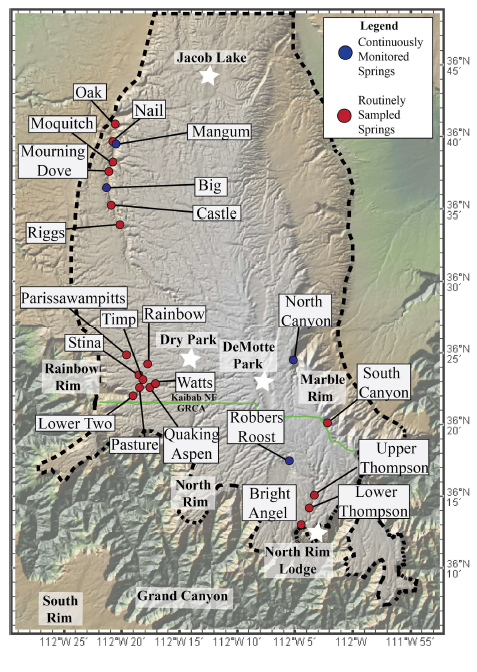

In [ ]:
Image('KP_springs.png')

# Peform heirarchical clustering on dataset using Ward's average linkage algo and see how it compares to kmeans+ and mixture of Gaussians

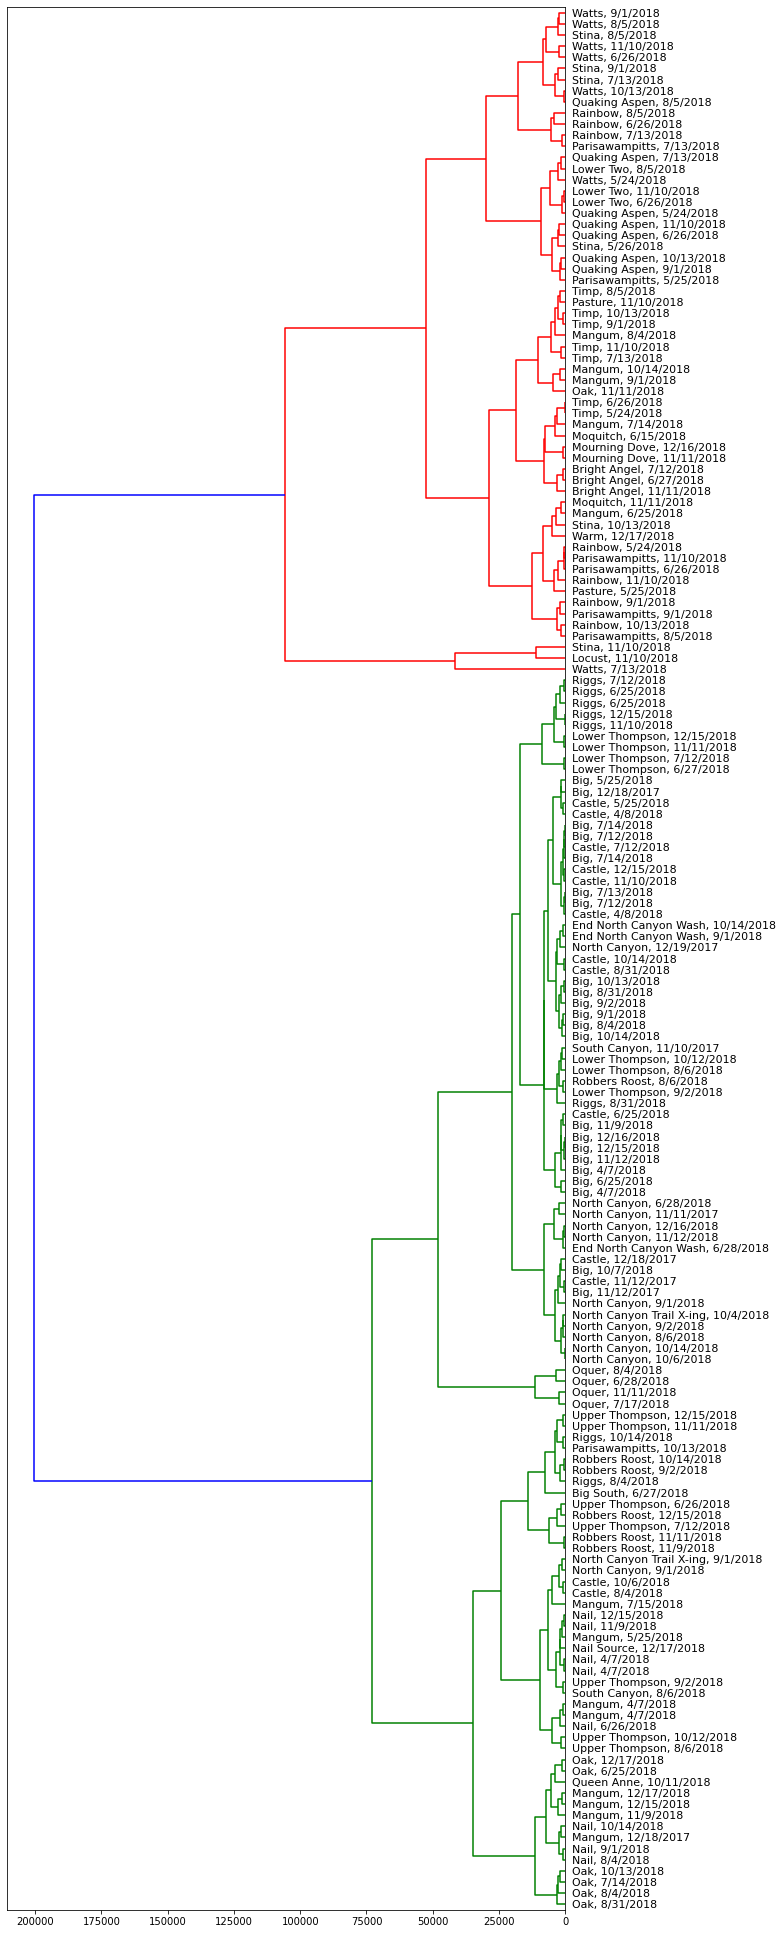

In [50]:
# Adjust figure size to accommodate the full tree
from pylab import rcParams
rcParams['figure.figsize'] = 10, 35

# Do hierarchical clustering using Ward's method
z = sch.linkage(KPchem3, method='ward')

# Display dendrogram
info = sch.dendrogram(z, orientation='left', labels=KPchem3.index, leaf_font_size=11)  #labels=KPchem['Names'],